In [1]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Using Theano backend.
Using gpu device 1: GeForce GTX TITAN X (CNMeM is enabled with initial size: 2500 MB, cuDNN 5005)


In [2]:
json_model = "/mnt/lab_data/kundaje/users/pgreens/projects/hematopoiesis/deep_learning/model_files/hema_model_jason_only_feb7_idr_K562_GM12878_CV_corePeakSize_250_totalPeakSize_2000_negFlanks_Sequential_1D_model/record_1_model_GbsDh_modelJson.json"
weights_file = "/mnt/lab_data/kundaje/users/pgreens/projects/hematopoiesis/deep_learning/model_files/hema_model_jason_only_feb7_idr_K562_GM12878_CV_corePeakSize_250_totalPeakSize_2000_negFlanks_Sequential_1D_model/record_1_model_GbsDh_modelWeights.h5"
#dnase_features_file = "/users/mtaranov/dnaseEmbed_blood/data/seq_at_dnasePeaks_2kb_chr16.npy"
dnase_features_file = "/users/mtaranov/dnaseEmbed_blood/data/seq_at_dnasePeaks_2kb.npy"
#dnase_features_file = "/users/mtaranov/dnaseEmbed_blood/data/test_seq_at_dnasePeaks_2kb.npy"

In [3]:
X=np.load(dnase_features_file)

In [4]:
X.shape

(103298, 2000, 4)

In [5]:
# load json and create model
json_file = open(json_model, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_file)
print("Loaded model from disk")

Loaded model from disk


In [6]:
#predictions = loaded_model.predict(X)

### Get Embeddings

In [7]:
import itertools

def batch_iter(iterable, batch_size):
    '''iterates in batches.
    '''
    it = iter(iterable)
    try:
        while True:
            values = []
            for n in xrange(batch_size):
                values += (it.next(),)
            yield values
    except StopIteration:
        # yield remaining values
        yield values
#        exit  

def generate_from_array(array, batch_size=128):
    """
    Generates the array in batches.
    """

    batch_iterator = batch_iter(array, batch_size)
    for array_batch in batch_iterator:
        yield np.stack(array_batch, axis=0)

In [8]:
from keras.models import Model

batch_size = 128
generator = generate_from_array(X, batch_size=batch_size)

intermediate_layer_model = Model(input=loaded_model.layers[0].input,
                                   output=loaded_model.layers[-3].output)
layer_output = np.vstack([intermediate_layer_model.predict_on_batch(batch) for batch in generator])

In [9]:
# # with a Sequential model
# get_last_layer_output = K.function([loaded_model.layers[0].input, K.learning_phase()],
#                                   [loaded_model.layers[-3].output])
# layer_output = get_last_layer_output([X,0])[0]

In [10]:
np.save('/users/mtaranov/dnaseEmbed_blood/data/'+'layer_output.npy', layer_output)

In [5]:
first2comp = np.load('/users/mtaranov/dnaseEmbed_blood/data/tsne.npy')

In [6]:
first2comp.shape

(103298, 2)

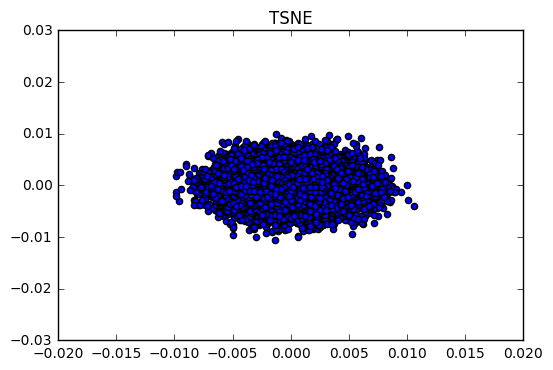

In [7]:
plt.scatter(first2comp[:,0], first2comp[:,1])
plt.title('TSNE')
plt.show()